<a href="https://colab.research.google.com/github/Jakkaton/Project/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create data

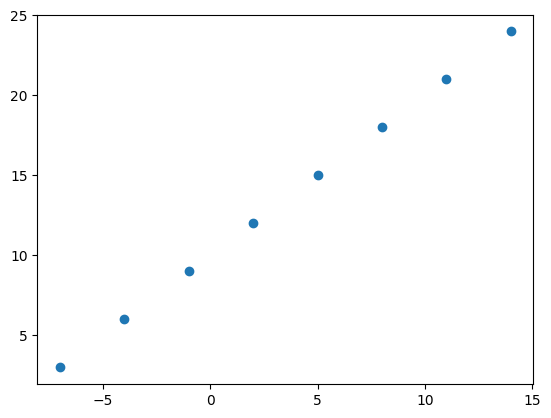

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crate a features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create a labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y);

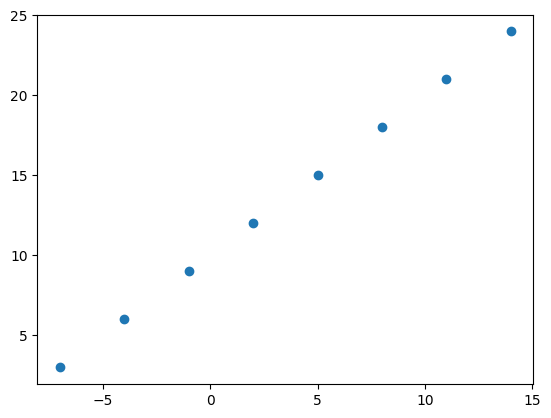

In [3]:
# Create a data using tensor
import tensorflow as tf

# Crate a features
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create a labels
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y);

In [4]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [5]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

# Modeling data with TensorFlow

Since we're using tensorflow version 2.7.+, the `fit( )` function no longer upslcales input data to go from `(batch_size,)` to `(batch_size, 1)`. To fix this, we'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis = -1)`.

In [6]:
# Create a random seed
tf.random.set_seed(59)

# Crate a model using The sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit a model
model.fit(tf.expand_dims(X, axis = -1), y , epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 489ms/step - loss: 7.6052 - mae: 7.6052
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 7.4812 - mae: 7.4812
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 7.4756 - mae: 7.4756


In [7]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 89ms/step


array([[29.266748]], dtype=float32)

# Improving a model

In [9]:
# Create a random seed
tf.random.set_seed(59)

#Crate a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# Fit a model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 306ms/step - loss: 12.0150 - mae: 12.0150
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8825 - mae: 11.8825
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7500 - mae: 11.7500
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6174 - mae: 11.6174
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.4850 - mae: 11.4850
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3524 - mae: 11.3524
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2199 - mae: 11.2199
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.0875 - mae: 11.0875
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9550 - mae: 10.9550
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8224 - mae: 10.8224
Epoch 11/100
1/1 [==============================] 

In [10]:
model.predict([17])

1/1 [==============================] - 0s 88ms/step


array([[30.070591]], dtype=float32)

# Evaluate a model

In [11]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
# Make labels for the dataset
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

One of the most common and mportant steps in a achine learning project is creating a training and test set (and whem required, a validation set).

* **Training set** - the model learns from this data, which is typically 70 - 80% of the total data avaible (like the coursse materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10 - 15% of the total data avaible (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, t's tpically 10 - 15% of the total data available (like the final exam you take at the end of the semester).

In [13]:
# Check how many samples we have
len(X)

50

In [14]:
# Split data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualizing the data

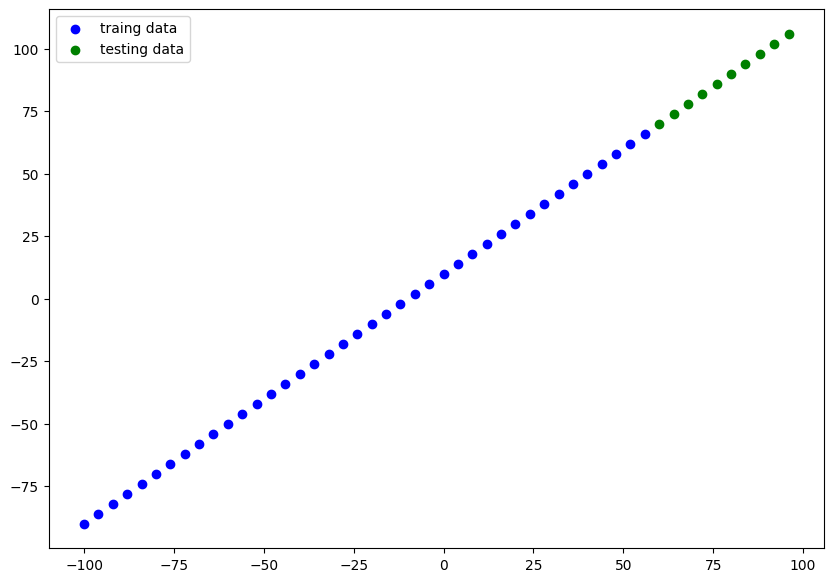

In [15]:
plt.figure(figsize = (10,7))
plt.scatter(X_train, y_train, c='b', label="traing data")
plt.scatter(X_test, y_test, c='g', label= "testing data")
plt.legend();

In [16]:
# Set a random seed
tf.random.set_seed(59)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# Complie a model
model.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.SGD(),
                      metrics= ['mae'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Alongside summary, we can also view 2D plot of the model using ```plot_model()```.

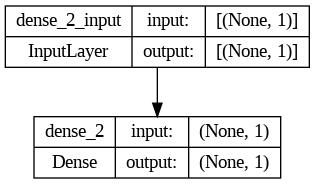

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True )

# Visualizing the predictions

In [19]:
# Make predictions
y_preds  = model.predict(X_test)

1/1 [==============================] - 0s 49ms/step


In [20]:
y_preds

array([[ 91.80206 ],
       [ 97.9222  ],
       [104.04234 ],
       [110.162476],
       [116.282616],
       [122.402756],
       [128.52289 ],
       [134.64304 ],
       [140.76317 ],
       [146.8833  ]], dtype=float32)

In [21]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares the predictions
  """

  plt.figure(figsize = (10,7))
  # Plot train data in blue
  plt.scatter(train_data, train_labels, c='b', label = "Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', label = "Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c='r', label = "Predictions")
  #Show the legend
  plt.legend();

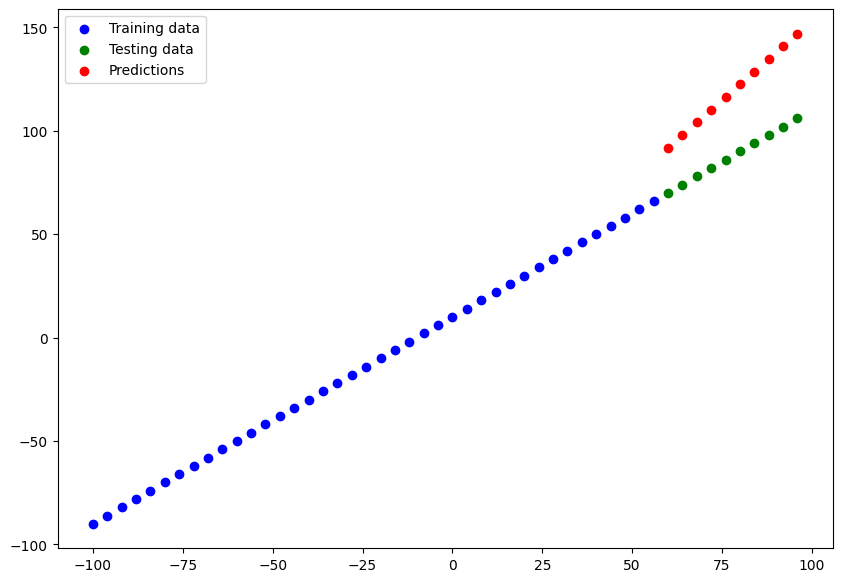

In [22]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

# Evaluating predictions

Alongside visualizations, evaluation metrics are the best alternative option for evaluating the model.
Depending on the problem being working on, different models have different evaluation metrics.

There are two main metrics used for regression promblems :

* Mean absolute error (MAE) - the mean difference between each of the predictions.
* Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [23]:
#Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 222ms/step - loss: 31.3427 - mae: 31.3427


[31.34268569946289, 31.34268569946289]

In this case, since using MAE for loss function as well as MAE for the metrics, `model.evaluate()` returns them both.

In [24]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                                        y_pred = y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.360413, 12.368881, 16.433874, 22.162476, 28.282618, 34.402756,
       40.52289 , 46.643036, 52.763172, 58.8833  ], dtype=float32)>

That's strange, MAE should be a single output. Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [25]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [26]:
# Check the predictions tensor value (notice the extra square brackets)
y_preds

array([[ 91.80206 ],
       [ 97.9222  ],
       [104.04234 ],
       [110.162476],
       [116.282616],
       [122.402756],
       [128.52289 ],
       [134.64304 ],
       [140.76317 ],
       [146.8833  ]], dtype=float32)

In [27]:
# Check the tensor shape
y_test.shape, y_preds.shape

((10,), (10, 1))

To fix it, I used `squeeze()` method, it'll remove the 1 dimension from y_preds tensor, making it the same shape as y_test.

In [28]:
y_preds.shape

(10, 1)

In [29]:
y_preds.squeeze().shape

(10,)

In [30]:
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 91.80206 ,  97.9222  , 104.04234 , 110.162476, 116.282616,
        122.402756, 128.52289 , 134.64304 , 140.76317 , 146.8833  ],
       dtype=float32))

Now, `y_test` and `y_preds` tensors are the same shape, we can use our evaluation metrics.

In [31]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=31.342686>

In [32]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1019.4476>

Also calculate the MAE using pure TensorFlow functions.

In [33]:
# Returns the same as tf.metrics.mean_absolte_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=31.342684936523437>

Make a function for evaluation metrics.

In [34]:
def mae(y_test, y_preds):
  """
  Calculates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test, y_preds)

def mse(y_test, y_preds):
  """
  Calculates mean sqaured error between y_test and y_pred.
  """
  return tf.metrics.mean_squared_error(y_test, y_preds)

# Running experiments to improve a model

In [35]:
# Set random seed
tf.random.set_seed(59)

# Replicate original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis = 1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 55.3618 - mae: 55.3618
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 20.0492 - mae: 20.0492
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 12.4028 - mae: 12.4028
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 11.3378 - mae: 11.3378
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0497 - mae: 12.0497
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.8311 - mae: 7.8311
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 13.4846 - mae: 13.4846
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8853 - mae: 12.8853
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 13.4642 - mae: 13.4642
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9673 - mae: 9.9673
Epoch 11/100
2/2 [==============================] - 0s 5ms/st

1/1 [==============================] - 0s 47ms/step


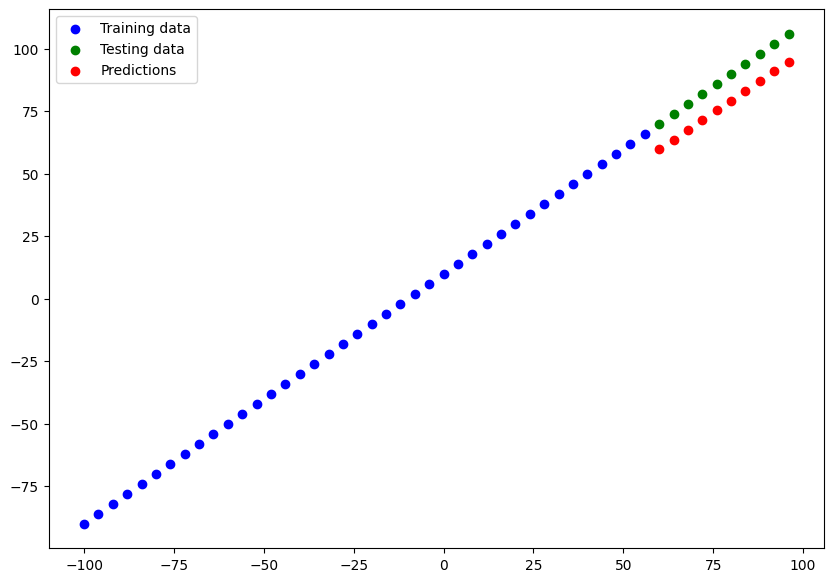

In [36]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [37]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(10.678584, 114.116776)

**Build** `model_2` :
This time, Add an extra dense layer

In [38]:
# Set random seed
tf.random.set_seed(59)

#Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 52ms/step


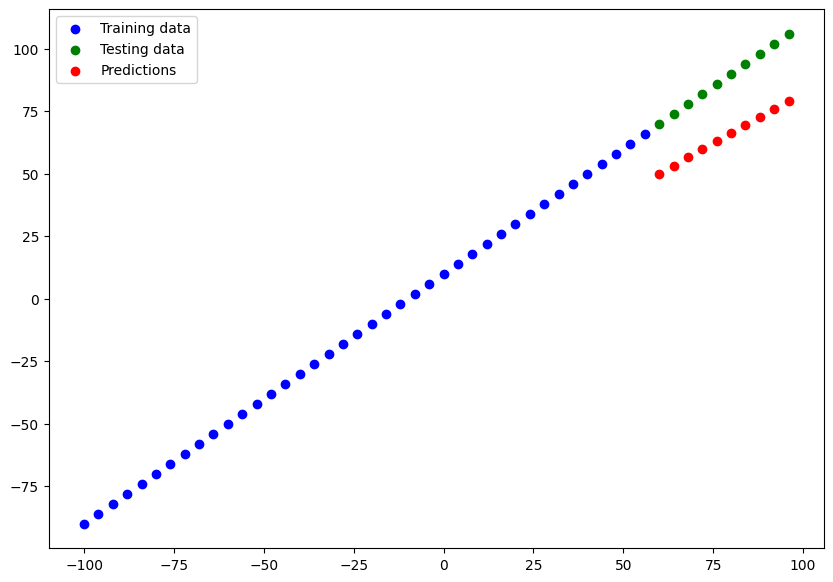

In [39]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [40]:
# Calcuate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(23.386927, 551.8075)

**Build** `model_3` : For the 3rd model keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

In [41]:
# Set random seed
tf.random.set_seed(59)

# Replicate model_2
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 56ms/step


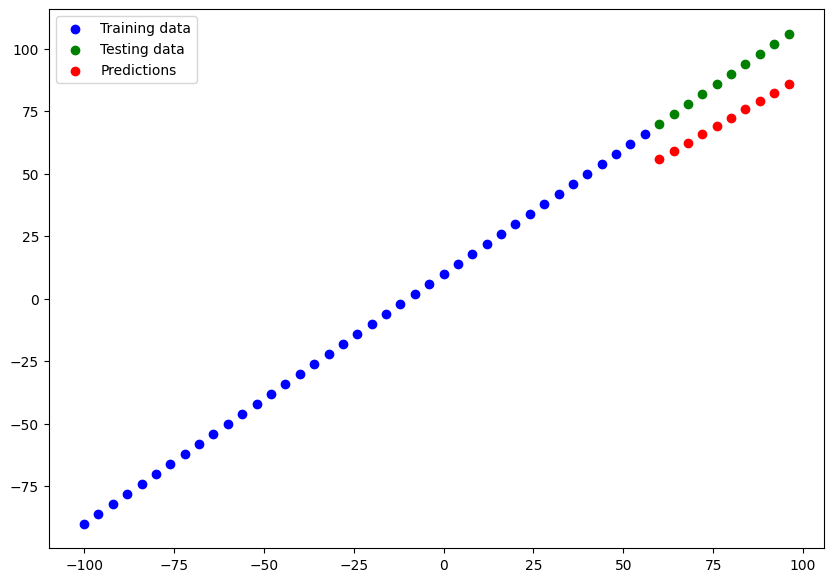

In [42]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [43]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3,mse_3

(17.175676, 298.75735)

# Comparing results

Now we've got results for 3 si,ilar but slightly different results, let's compare them

In [44]:
model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]
model_results

[['model_1', 10.678584, 114.116776],
 ['model_2', 23.386927, 551.8075],
 ['model_3', 17.175676, 298.75735]]

In [45]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,10.678584,114.116776
1,model_2,23.386927,551.807495
2,model_3,17.175676,298.757355


# Saving a model

In [47]:
# Save a model using the SaveModel format
model_1.save("best_model_SavedModel_format")

In [48]:
# Check it out
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


There is another way to save a model using HDF5 format

In [49]:
# Save a model using HDF5 format
model_1.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


# Loading a model
we can load a saved model using the `load_model()` method.

In [54]:
# Load a model from SaveModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Compare model_1 with the SavedModel version
model_1_preds = model_1.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 37ms/step


True

Loading in from the HDF5

In [58]:
# Load a model from th HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 69ms/step


True

# A larger example

This time, going to try predict the cost of medical insurance for individuals based on a number of differen parameters such as, `age` , `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, using athe publically available [Medical cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available from kaggel and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [60]:
# import libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [63]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have to turn the non-numerical columns into number because a nural network can't handle the non-numerical inputs.

we're going to use the `get_dummies()` method in pandas. It converts categorical variables (`sex`, `smoker` and `region` columns) into numerical variable using one-hot encoding.

In [65]:
# Turn all categories ito numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now, split data into features `X` and labels `y`.

In [68]:
# Create X anf y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [69]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [85]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state= 59)

In [86]:
# set random seed
tf.random.set_seed(59)

#Create a new model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12794.5068 - mae: 12794.5068
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11954.6660 - mae: 11954.6660
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11129.6924 - mae: 11129.6924
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 10383.0723 - mae: 10383.0723
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9748.2754 - mae: 9748.2754
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9203.6943 - mae: 9203.6943
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8741.1836 - mae: 8741.1836
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8374.8223 - mae: 8374.8223
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8080.9868 - mae: 8080.9868
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7857.4194 - mae: 7

In [87]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7175.6152 - mae: 7175.6152


[7175.615234375, 7175.615234375]

It didn't perform very well, let's try a bigger model.

we'll try 3 things:

- Increasing the number of layers (from 1 to 2 maybe 3).
- Increaing the number of unit in each layer (except for the output layer).
- Changing the optimizer (from SGD to adam).

In [88]:
# Set random seed
tf.random.set_seed(59)

#Add an extra layers and increase a number of units
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [89]:
# Evaluate our large model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7644.4038 - mae: 7644.4038


[7644.40380859375, 7644.40380859375]

the two layers didn't perform as well as i had expected. i will try increasingthe number of layers by one.

In [99]:
# Set random seed
tf.random.set_seed(59)

#Add an extra layers and increase a number of units
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [100]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5123.6328 - mae: 5123.6328


[5123.6328125, 5123.6328125]

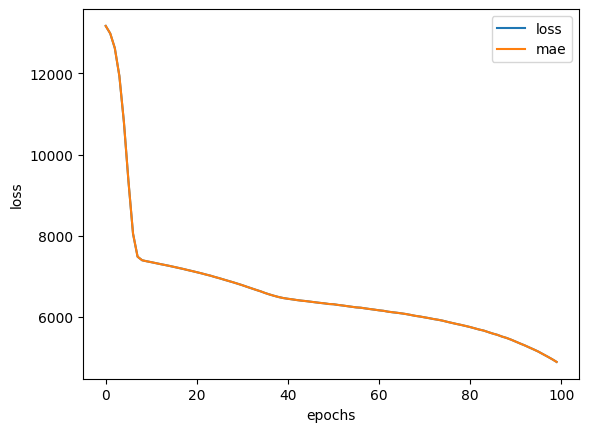

In [101]:
# plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [102]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [103]:
# Evaluate the odel trained for 200 total epochs
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test, y_test)
insurance_model_3_loss, insurance_model_3_mae

9/9 [==============================] - 0s 6ms/step - loss: 3778.0503 - mae: 3778.0503


(3778.05029296875, 3778.05029296875)

Text(0.5, 0, 'epochs')

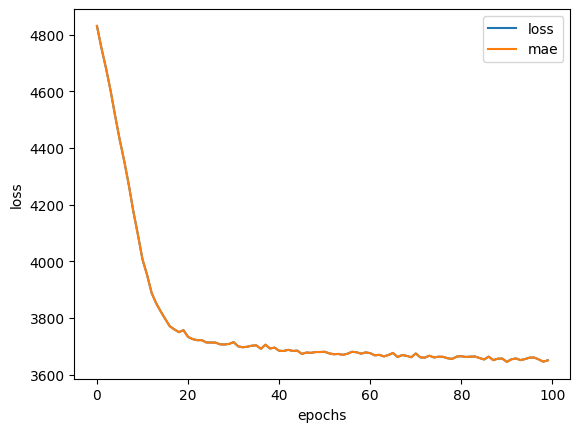

In [104]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)



In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [110]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Transform the non-numeriacal columns into number and also be normalizing the numerical columns with different ranges.

To do ths, we're going to use a few classes from Scikit-Learn:
- `make_column_transformer` - build a multi-step data preprocessing function for the following trasformation:
  * `MinMaxScaler` - make sure all numerical columns are nomalizes (between 0 and 1).
  * `OneHotEncoder` - one hot encode the on-numerical columns.

In [111]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Fit column tranformer on the training data only(doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalizeation (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [112]:
# Non-normalized and non-encoded data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [114]:
# Normalized and encoded data
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [116]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [118]:
# Set random seed
tf.random.set_seed(59)

# Build the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs
insurance_model_4.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [120]:
# Evaluate the model
insurance_model_4_loss, insurance_model_4_mae = insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.0764 - mae: 3171.0764


In [124]:
# Compare a modelling results from non-normalized data and normalized data
insurance_model_3_mae, insurance_model_4_mae

(3778.05029296875, 3171.076416015625)

From this result, we can see normalizing the data results in 10% less error using the same model than not normalizing the data.

`insurance_model_3` may have eventually achieved the same results as `insurance_model_4` if we left it training for longer.